In [51]:
import json
import numpy as np
import open3d as o3d

import matplotlib.pyplot as plt

import os
from copy import deepcopy

# Data IO

## 1.1 Example point cloud paired data

In [9]:
manual_folder = r'/home/crest/w/hwang_Pro/data/2023_hokkaido_potato/rgbd_models'

mesh_folder = r'/home/crest/w/hwang_Pro/data/2023_hokkaido_potato/outputs/models'

In [21]:
mesh_models = { i.split('.')[0]: os.path.join(mesh_folder, i) 
               for i in os.listdir(mesh_folder) if '.obj' in i}

# add fixed
for i in os.listdir(mesh_folder + '.fix'):
    if '.obj' in i:
        mesh_models[i.split('.')[0]] =  os.path.join(mesh_folder+'.fix', i) 
                    

mesh_models.keys()

dict_keys(['2R1-1', '2R1-2', '2R1-3', '2R1-4', '2R1-5', '2R1-6', '2R1-7', '2R1-8', '2R1-9', '2R1-10', '2R1-11', '2R2-1', '2R2-2', '2R2-3', '2R2-4', '2R2-5', '2R2-6', '2R2-7', '2R2-8', '2R2-9', '2R2-10', '2R3-1', '2R3-2', '2R3-3', '2R3-4', '2R3-5', '2R3-6', '2R3-7', '2R3-8', '2R3-9', '2R3-10', '3R1-1', '3R1-2', '3R1-3', '3R1-4', '3R1-5', '3R1-6', '3R1-7', '3R1-8', '3R1-9', '3R1-10', '3R2-1', '3R2-2', '3R2-3', '3R2-4', '3R2-5', '3R2-6', '3R2-7', '3R2-8', '3R2-9', '3R2-10', '3R3-1', '3R3-2', '3R3-3', '3R3-4', '3R3-5', '3R3-6', '3R3-7', '3R3-8', '3R3-9', '3R3-10', '3R4-1', '3R4-2', '3R4-3', '3R4-4', '3R4-5', '3R4-6', '3R4-7', '3R4-8', '3R4-9', '3R4-10', '3R5-1', '3R5-2', '3R5-3', '3R5-4', '3R5-5', '3R5-6', '3R5-7', '3R5-8', '3R5-9', '3R5-10', '3R6-1', '3R6-2', '3R6-3', '3R6-4', '3R6-5', '3R6-6', '3R6-7', '3R6-8', '3R6-9', '3R6-10', '3R7-1', '3R7-2', '3R7-3', '3R7-4', '3R7-5', '3R7-6', '3R7-7', '3R7-8', '3R7-9', '3R7-10', '4R1-1', '4R1-2', '4R1-3', '4R1-4', '4R1-5', '4R1-6', '4R1-7', '4R1-8

In [7]:
manual_matrix_file = os.path.join(manual_folder, 'tmatrix.json')

with open(manual_matrix_file) as f:
    manual_matrix = json.load(f)

manual_matrix

{'3R6-4': {'rms': 0.00331729,
  'T': [[-0.166, -0.677, 0.749, 0.244],
   [-0.144, -0.735, -0.696, -0.237],
   [0.999, -0.218, 0.024, 0.098],
   [0.0, 0.0, 0.0, 1.0]]},
 '4R5-1': {'RMS': 0.00213853,
  'T': [[-0.25, -0.372, 0.891, 0.257],
   [-0.4, -0.797, -0.446, -0.181],
   [0.879, -0.469, 0.051, 0.226],
   [0.0, 0.0, 0.0, 1.0]]},
 '5R1-7': {'RMS': 0.00220823,
  'T': [[0.367, -0.579, 0.769, 0.214],
   [0.468, -0.612, -0.684, -0.274],
   [0.842, 0.593, 0.045, 0.039],
   [0.0, 0.0, 0.0, 1.0]]},
 'R7-7': {'RMS': 0.00124765,
  'T': [[0.04, -0.106, 1.06, 0.355],
   [-0.08, 1.057, 0.109, 0.042],
   [-1.062, -0.084, 0.032, 0.023],
   [0.0, 0.0, 0.0, 1.0]]},
 'R13-8': {'RMS': 0.00299409,
  'T': [[-0.506, -0.167, 0.895, 0.357],
   [0.864, 0.234, 0.532, 0.034],
   [-0.286, 1.001, 0.025, 0.191],
   [0.0, 0.0, 0.0, 1.0]]}}

In [12]:
for k, v in manual_matrix.items():
    manual_matrix[k]['path'] = os.path.join(manual_folder, k + '.pcd')

manual_matrix

{'3R6-4': {'rms': 0.00331729,
  'T': [[-0.166, -0.677, 0.749, 0.244],
   [-0.144, -0.735, -0.696, -0.237],
   [0.999, -0.218, 0.024, 0.098],
   [0.0, 0.0, 0.0, 1.0]],
  'path': '/home/crest/w/hwang_Pro/data/2023_hokkaido_potato/rgbd_models/3R6-4.pcd'},
 '4R5-1': {'RMS': 0.00213853,
  'T': [[-0.25, -0.372, 0.891, 0.257],
   [-0.4, -0.797, -0.446, -0.181],
   [0.879, -0.469, 0.051, 0.226],
   [0.0, 0.0, 0.0, 1.0]],
  'path': '/home/crest/w/hwang_Pro/data/2023_hokkaido_potato/rgbd_models/4R5-1.pcd'},
 '5R1-7': {'RMS': 0.00220823,
  'T': [[0.367, -0.579, 0.769, 0.214],
   [0.468, -0.612, -0.684, -0.274],
   [0.842, 0.593, 0.045, 0.039],
   [0.0, 0.0, 0.0, 1.0]],
  'path': '/home/crest/w/hwang_Pro/data/2023_hokkaido_potato/rgbd_models/5R1-7.pcd'},
 'R7-7': {'RMS': 0.00124765,
  'T': [[0.04, -0.106, 1.06, 0.355],
   [-0.08, 1.057, 0.109, 0.042],
   [-1.062, -0.084, 0.032, 0.023],
   [0.0, 0.0, 0.0, 1.0]],
  'path': '/home/crest/w/hwang_Pro/data/2023_hokkaido_potato/rgbd_models/R7-7.pcd'},
 '

## 1.2 Check the manual labeled transform matrix

In [25]:
check_pair = '4R5-1'

mesh = o3d.io.read_triangle_mesh(mesh_models[check_pair], enable_post_processing=True, print_progress=False)
pcd = o3d.io.read_point_cloud(manual_matrix[check_pair]['path'])

pcd_t = deepcopy(pcd).transform(manual_matrix[check_pair]['T'])
o3d.visualization.draw_geometries([mesh, pcd], window_name="source")
# o3d.visualization.draw_geometries([mesh, pcd_t], window_name="transformed")

# 2 Transform Matrix calculate

In [32]:
len(pcd.points)

20169

In [34]:
sampled = mesh.sample_points_uniformly(int(len(pcd.points) * 1.5))

The color is not correct

In [35]:
o3d.visualization.draw_geometries([sampled, pcd], window_name="sampled|")

In [37]:
np.asarray(mesh.triangle_uvs)

array([[0.70023698, 0.59477198],
       [0.69991398, 0.600088  ],
       [0.69275999, 0.59913403],
       ...,
       [0.39287001, 0.33702299],
       [0.39103001, 0.34378001],
       [0.386354  , 0.33408099]])

In [ ]:
np.asarray(mesh.t)

In [38]:
mesh.textures

[Image of size 2048x2048, with 3 channels.
 Use numpy.asarray to access buffer data.]

In [40]:
import trimesh

In [41]:
mesh_tri = trimesh.load_mesh(mesh_models[check_pair])
samples, face_idx, colors = trimesh.sample.sample_surface(mesh_tri, 30000, sample_color=True)

In [42]:
samples

TrackedArray([[-0.02273087, -0.02306958,  0.09844219],
              [ 0.01121513, -0.01319448,  0.12260506],
              [-0.01555761, -0.01904144,  0.07010435],
              ...,
              [-0.01837359, -0.00907066,  0.12926298],
              [ 0.00112824,  0.01295303,  0.04827272],
              [-0.02473023,  0.00378285,  0.12756089]])

In [43]:
face_idx

array([20090, 30583,  7311, ..., 34022,   306, 32653])

In [44]:
colors

TrackedArray([[119,  95,  59, 255],
              [118,  84,  46, 255],
              [131, 114,  84, 255],
              ...,
              [188, 169, 126, 255],
              [ 91,  71,  42, 255],
              [196, 175, 120, 255]], dtype=uint8)

In [45]:
def mesh2pcd(mesh_path, points_num):
    # read and sample mesh by trimesh
    mesh_tri = trimesh.load_mesh(mesh_models[check_pair])
    samples, face_idx, colors = trimesh.sample.sample_surface(mesh_tri, 30000, sample_color=True)

    o3d_rgb = colors[:,0:3] / 255

    # convert trimesh to open3d objects
    final_pcd = o3d.geometry.PointCloud()
    final_pcd.points = o3d.utility.Vector3dVector(samples)
    final_pcd.colors = o3d.utility.Vector3dVector(o3d_rgb)

    return final_pcd


In [47]:
sampled = mesh2pcd(mesh_models[check_pair], int(len(pcd.points) * 1.5))

In [48]:
o3d.visualization.draw_geometries([sampled, pcd], window_name="sampled|")

Seems detection the pin points on the point cloud is difficult?

Need to do the pin extraction on 2D then back to 3D

## 2.1 Pile RGBD point cloud to raster along XY plane

In [50]:
rgbd_xyz, rgbd_color = np.asarray(pcd.points), np.asarray(pcd.colors)

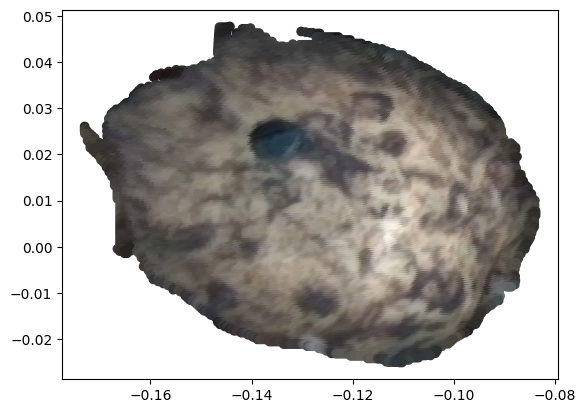

In [53]:
plt.scatter(*rgbd_xyz[:,0:2].T, color=rgbd_color)

In [54]:
rgbd_xyz

array([[-0.14634617,  0.0475239 , -0.32600001],
       [-0.14584751,  0.0475239 , -0.32600001],
       [-0.14534886,  0.0475239 , -0.32600001],
       ...,
       [-0.11082672, -0.0249277 , -0.31299999],
       [-0.1107005 , -0.02500734, -0.31400001],
       [-0.11022021, -0.02500734, -0.31400001]])

In [72]:
ux = np.sort(np.unique(rgbd_xyz[:,0]))
uy = np.sort(np.unique(rgbd_xyz[:,1]))

ux, uy

(array([-0.17302112, -0.17296837, -0.17253165, ..., -0.08401576,
        -0.08395463, -0.08380389]),
 array([-0.02500734, -0.0249277 , -0.02484806, ...,  0.04731249,
         0.0475239 ,  0.04766968]))

In [77]:
dist_x = ux[1:] - ux[:-1] 
dist_y = uy[1:] - uy[:-1] 

dist_x

array([5.27501106e-05, 4.36723232e-04, 5.12152910e-05, ...,
       5.50225377e-05, 6.11320138e-05, 1.50740147e-04])

In [78]:
dist_x.min(), dist_x.max()

(9.685754776000977e-08, 0.0004367232322692871)

In [70]:
distances

array([0.00049865, 0.0009973 , 0.00149596, ..., 0.00014924, 0.00061171,
       0.00048029])

In [71]:
distances.min()

1.4634891769560347e-05

In [62]:
best_grid_spacing

0.02981839184281783

In [82]:
def generate_grids(xyz, color, grid_size=0.25):

    xmin = np.min(xyz[:,0])
    xmax = np.max(xyz[:,0])
    ymin = np.min(xyz[:,1])
    ymax = np.max(xyz[:,1])

    # number of columns
    nx = int((xmax - xmin ) / grid_size + 1)
    # number of rows
    ny = int((ymax - ymin ) / grid_size + 1)

    ixy = np.floor((xyz[:,0:2] - np.array([xmin, ymin])) / grid_size).astype(np.int32)

    raster = np.zeros((nx, ny, 3))

    raster[ixy[:,0], ixy[:,1], :] = color

    return {'ixy': ixy, 'shape': (nx, ny), 'size': grid_size, 
            'offset': np.array([xmin, ymin]), 'raster': raster}

In [106]:
rgbd_raster = generate_grids(rgbd_xyz, rgbd_color, 0.001)

In [107]:
rgbd_raster['ixy']

array([[26, 72],
       [27, 72],
       [27, 72],
       ...,
       [62,  0],
       [62,  0],
       [62,  0]], dtype=int32)

In [108]:
rgbd_raster['shape']

(90, 73)

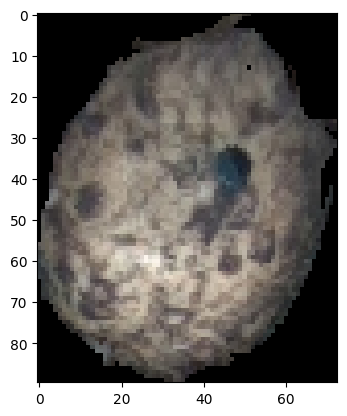

In [109]:
plt.imshow(rgbd_raster['raster'])

## 2.2 Detect pin on RGB

## 2.3 Detect pin on mesh texture

```python
import open3d as o3d

# Load the 3D model
mesh = o3d.io.read_triangle_mesh("path_to_your_mesh.obj")

# Load the texture image
texture = o3d.io.read_image("path_to_your_texture.png")

# Map texture pixels to 3D positions
vertices = mesh.vertices
uv = mesh.triangle_uvs
width, height = texture.width, texture.height
for face in mesh.triangles:
    for i in range(3):
        vertex_id = face[i]
        u, v, _ = uv[vertex_id]
        x = int(u * (width - 1))
        y = int(v * (height - 1))
        color = texture[y, x]
        # Now you can use the u, v coordinates and the corresponding 3D vertex to do further processing
```

trimesh

```python
import trimesh

# Load the 3D model
mesh = trimesh.load("path_to_your_mesh.obj")

# Load the texture image
texture = trimesh.visual.texture.TextureVisuals("path_to_your_texture.png")

# Map texture pixels to 3D positions
uv = mesh.visual.uv
vertices = mesh.vertices
width, height = texture.image.size
for face in mesh.faces:
    for i in range(3):
        vertex_id = face[i]
        u, v = uv[vertex_id]
        x = int(u * (width - 1))
        y = int(v * (height - 1))
        color = texture.image[y, x]
        # Now you can use the u, v coordinates and the corresponding 3D vertex to do further processing
```

# 2.4 Pin merge algorithm

1. find paired pin center (test by manual picking)
2. filter out the neighbour points around a given radius (execude outliers in the back)
3. rough pair by the neighbour round surface (center: pin points, bbox to find normals -> rough matrix)
4. based on previous matrix, for complete shape calcuate error 
5. full registration, calcuate matrix and error
6. compare if error decrease, or whether matrix changed significantly

In [110]:
manual_picked = r'R7-7'

manual_rgbd_center = 853
manual_rgbd_center_xyz = np.array([-0.0900177955627,0.00101000221912,-0.319000005722])

manual_sfm_center = 6320
manual_sfm_center_xyz = np.array([0.0143025163561,0.0144135113806,0.107981361449])